In [1]:
import pandas as pd
import numpy as np

importing the data set

In [2]:
myFrame = pd.read_csv(r"C:\Users\Ahmed\Downloads\xx\Salaries.csv")

Get a general idea about the frame, 

In [3]:
print(myFrame.head()) #printing first few rows
print(f"num of rows are: {myFrame.shape[0]}") #get number of rows in the frame using shape[]
print(f"num of columns are: {myFrame.shape[1]}") ##get number of columns in the frame shape[]
print(myFrame.dtypes) #get fields data types to see if there is a mismatch

   Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25       NaN  567595.43         567595.43   
1  155966.02    245131.88  137811.38       NaN  538909.28         538909.28   
2  212739.13    106088.18   16452.60       NaN  335279.91         335279.91   
3   77916.00     56120.71  198306.90       NaN  332343.61         332343.61   
4  134401.60      9737.00  182234.59       NaN  326373.19         326373.19   

   Year  Notes         Agency  Status  
0  2011    NaN  San Francisc

Checking for NANs "missing values"

In [4]:
print(myFrame.isnull().sum()) # using the isnull() fun which return bool value, and use it with sum()..
                              # this formula returns number of missing values in each data field

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


a. Droping full missing data columns..

In [5]:
myFrame = myFrame.drop(["Notes","Status"], axis = 1) #remove both column as they has no data in them, not useful
print(f"new number of columns: {myFrame.shape[1]}")  

new number of columns: 11


Give Statistical summary,

In [6]:
basePayMean = myFrame["BasePay"].mean()
basePayMedian = myFrame["BasePay"].median()
basePayMode = myFrame["BasePay"].mode().iloc[0] 
minBasePay = myFrame["BasePay"].min()
maxBasePay = myFrame["BasePay"].max()
basePaySTD = myFrame["BasePay"].std()

print("statistical insights:")
print(f"Mean: {basePayMean}")
print(f"Median: {basePayMedian}")
print(f"Mode: {basePayMode}")
print(f"Minimum: {minBasePay}")
print(f"Maximum: {maxBasePay}")
print(f"Standard Deviation: {basePaySTD}")

statistical insights:
Mean: 66325.4488404877
Median: 65007.45
Mode: 0.0
Minimum: -166.01
Maximum: 319275.01
Standard Deviation: 42764.63549525958


Note: a minimum salary turns out to be negative value
we should handle that

In [7]:
negBasePayRecs = myFrame[myFrame["BasePay"] < 0]
print(f"number of negative salaries: {negBasePayRecs.shape[0]}") # see if that is a common problem

number of negative salaries: 11


Only 11 records have this data entry miss, we will remove them as they 
represent a tiny part of the data set

In [8]:
myFrame = myFrame.drop(negBasePayRecs.index) # remove records with negative salaries
print(f"new num of rows: {myFrame.shape[0]}") 

new num of rows: 148643


In [9]:
zeroBasePayRecs = myFrame[myFrame["BasePay"] == 0]
                                                    # doing the same with zero salary values
print(f"number of emp with zero Base Salary: {zeroBasePayRecs.shape[0]}")

number of emp with zero Base Salary: 1298


I won't drop records with zero base pay as this may be due to business nature, 

Hanling NANs "missing values",

In [10]:
print(myFrame.isnull().sum()) #check which fields have missingg data

Id                      0
EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64


In [11]:
from sklearn.impute import SimpleImputer #import SimpleImputer to use it in handling NANs

In [12]:
nanFields = ["BasePay", "OvertimePay", "OtherPay", "Benefits"] #making a list of fileds which have NANs to deal w it,
imputer = SimpleImputer(strategy = "mean") # use the mean strategy as our fields are all numeric
myFrame[nanFields] = imputer.fit_transform(myFrame[nanFields])

In [13]:
print(myFrame.isnull().sum()) # checking for NANs after Handling,

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


Visualization..

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import*

Histogram for salary distribution,

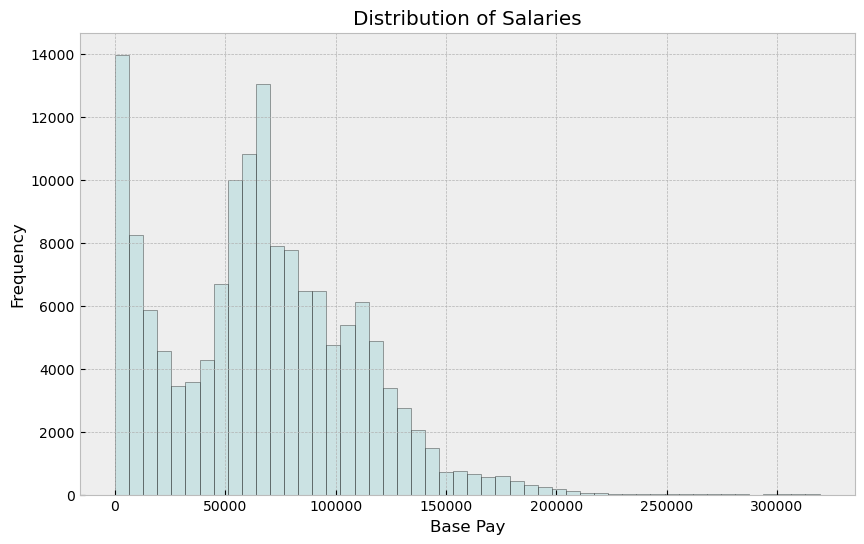

In [15]:
plt.style.use("bmh")
plt.figure(figsize = (10,6))
plt.hist(myFrame["BasePay"], histtype = "bar", bins = 50, color = '#AAD7D9', edgecolor = "black", alpha=0.5)
plt.title('Distribution of Salaries')
plt.xlabel('Base Pay')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Pie chart for employees propotion

In [16]:
depCount = myFrame['JobTitle'].value_counts().head(10) # seeing all possible Job titles for the pie sections,
print(depCount)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Name: JobTitle, dtype: int64


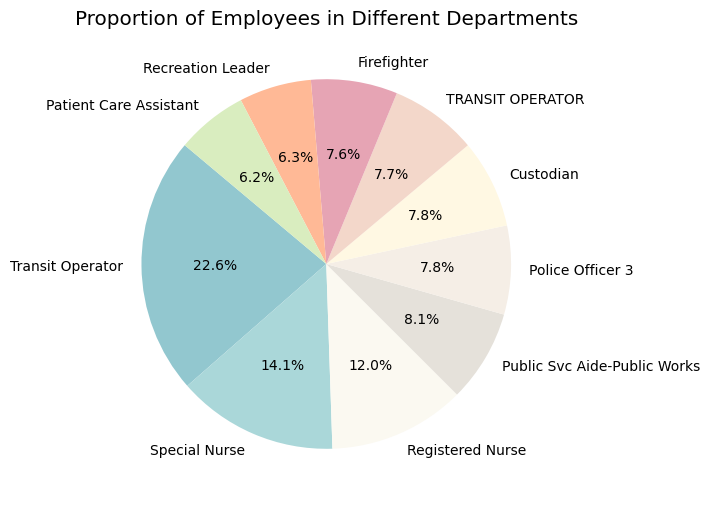

In [17]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 6))
colors = ['#92C7CF','#AAD7D9','#FBF9F1','#E5E1DA','#F5EEE6', '#FFF8E3', '#F3D7CA', '#E6A4B4','#FFB996','#D9EDBF']
plt.pie(depCount, labels = depCount.index, autopct = '%1.1f%%', startangle = 140, textprops = {'color': 'black'}, colors = colors)
plt.title('Proportion of Employees in Different Departments')
plt.show()

Grouped analysis,

In [18]:
print(myFrame.info()) # seeing frame full details to select a suitable field to group by it,

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148643 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148643 non-null  int64  
 1   EmployeeName      148643 non-null  object 
 2   JobTitle          148643 non-null  object 
 3   BasePay           148643 non-null  float64
 4   OvertimePay       148643 non-null  float64
 5   OtherPay          148643 non-null  float64
 6   Benefits          148643 non-null  float64
 7   TotalPay          148643 non-null  float64
 8   TotalPayBenefits  148643 non-null  float64
 9   Year              148643 non-null  int64  
 10  Agency            148643 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 13.6+ MB
None


In [19]:
myFrame = myFrame.drop(["Id"], axis = 1) # remove the id column also as it is not useful for the analysis

In [20]:
tBCFrame = myFrame[["JobTitle","BasePay","OvertimePay","OtherPay","Benefits","TotalPay","TotalPayBenefits"]] 
                                            # here i choosed this columns excluding object fields as
                                            # they don't suit statistical calculation
        
groupedFrame = tBCFrame.groupby("JobTitle") # use of groupby() fun to group the data by the "JobTitle" column ,

print(groupedFrame.mean())
print(groupedFrame.median())
print(groupedFrame.std())
                            # diong grouped statistical overview,
print(groupedFrame.min())
print(groupedFrame.max())
print(groupedFrame.sum())
print(groupedFrame.count())

avgBaseSal = groupedFrame["BasePay"].mean() #comparing the average salary across different groups,
print(avgBaseSal)

                                                     BasePay  OvertimePay  \
JobTitle                                                                    
ACCOUNT CLERK                                   43300.806506   373.200843   
ACCOUNTANT                                      46643.172000     0.000000   
ACCOUNTANT INTERN                               28732.663958    24.430625   
ACPO,JuvP, Juv Prob (SFERS)                     62290.780000     0.000000   
ACUPUNCTURIST                                   66374.400000     0.000000   
...                                                      ...          ...   
X-RAY LABORATORY AIDE                           47664.773077  3571.223462   
X-Ray Laboratory Aide                           46086.387100  3483.767100   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  52609.910000     0.000000   
Youth Comm Advisor                              39077.957500     0.000000   
ZOO CURATOR                                     43148.000000     0.000000   

In [21]:
print(myFrame.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148643 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148643 non-null  object 
 1   JobTitle          148643 non-null  object 
 2   BasePay           148643 non-null  float64
 3   OvertimePay       148643 non-null  float64
 4   OtherPay          148643 non-null  float64
 5   Benefits          148643 non-null  float64
 6   TotalPay          148643 non-null  float64
 7   TotalPayBenefits  148643 non-null  float64
 8   Year              148643 non-null  int64  
 9   Agency            148643 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 12.5+ MB
None


Simple correlation analysis,

In [22]:
import seaborn as sns

In [23]:
correlation = myFrame['BasePay'].corr(myFrame['TotalPay']) # identify correlation between BasePay and TotalPay columns,
print("Correlation between 'BasePay' and 'TotalPay'is :",correlation)

Correlation between 'BasePay' and 'TotalPay'is : 0.9505054094571114


Gives a strong positive correaltion, means they hard related to eachother,

Visualizing correlation with Scatter plot

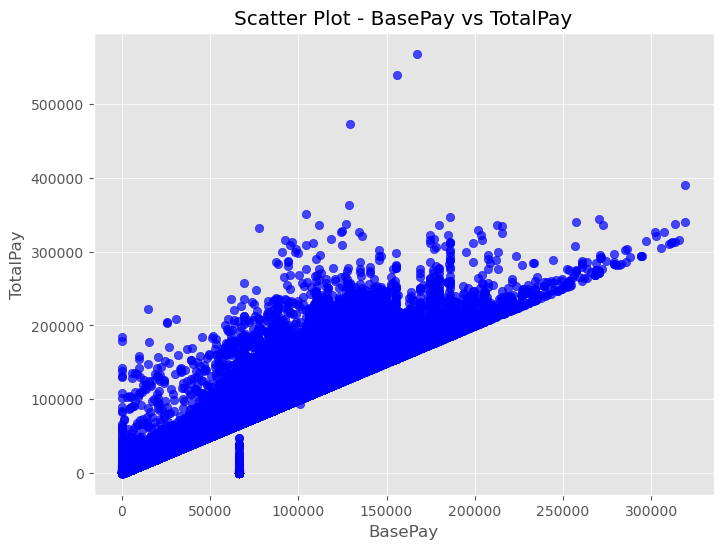

In [24]:
plt.style.use("ggplot")
plt.figure(figsize=(8, 6))
plt.scatter(myFrame['BasePay'], myFrame['TotalPay'], color='blue', alpha=0.7)
plt.title('Scatter Plot - BasePay vs TotalPay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.grid(True)
plt.show()

Give a full correlation Overview,

In [25]:
fCFrame = myFrame.select_dtypes(exclude = "object") #get only numeric fields for corr calculation
c = fCFrame.corr()
print(c)

                   BasePay  OvertimePay  OtherPay  Benefits  TotalPay  \
BasePay           1.000000     0.266609  0.283735  0.806623  0.950505   
OvertimePay       0.266609     1.000000  0.316582  0.268514  0.504841   
OtherPay          0.283735     0.316582  1.000000  0.203586  0.470474   
Benefits          0.806623     0.268514  0.203586  1.000000  0.782644   
TotalPay          0.950505     0.504841  0.470474  0.782644  1.000000   
TotalPayBenefits  0.942988     0.467961  0.422316  0.842996  0.977309   
Year              0.033687     0.027872 -0.002515 -0.027522  0.032042   

                  TotalPayBenefits      Year  
BasePay                   0.942988  0.033687  
OvertimePay               0.467961  0.027872  
OtherPay                  0.422316 -0.002515  
Benefits                  0.842996 -0.027522  
TotalPay                  0.977309  0.032042  
TotalPayBenefits          1.000000  0.151909  
Year                      0.151909  1.000000  


Visualize the correlation information with a heat map ,

<Axes: >

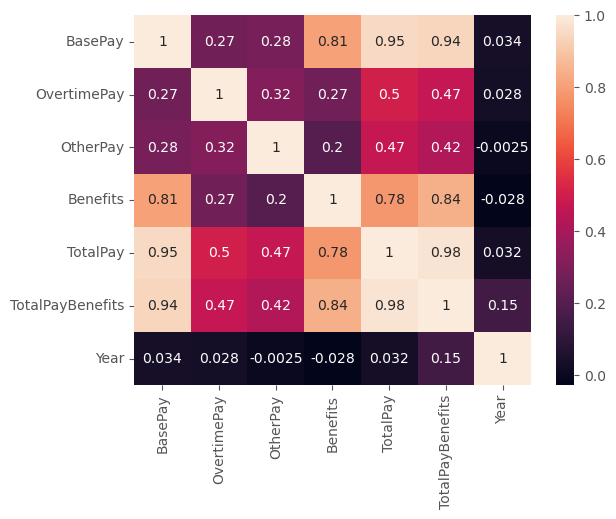

In [26]:
sns.heatmap(c, annot = True) # use heatmap() fun and pass corr as parameter to visualize it

In [27]:
print(myFrame.head(10)) # final look at the frame

         EmployeeName                                        JobTitle  \
0      NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1        GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2      ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4     PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   
5      DAVID SULLIVAN                       ASSISTANT DEPUTY CHIEF II   
6           ALSON LEE              BATTALION CHIEF, (FIRE DEPARTMENT)   
7       DAVID KUSHNER                  DEPUTY DIRECTOR OF INVESTMENTS   
8      MICHAEL MORRIS              BATTALION CHIEF, (FIRE DEPARTMENT)   
9  JOANNE HAYES-WHITE          CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay      Benefits   TotalPay  \
0  167411.18         0.00  400184.25  25010.338433  567595.43   
1  155966.02    245131.88  137811.38  25010.338433  538909.28   
2



Summary Insights Report: Analysis of Employee Salary Data:

1. Data Overview:
   - The dataset consists of employee information with 13 columns, including details such as employee name, job title, base pay, overtime pay, benefits, and more.
   - The initial dataset contained 148,654 rows and 13 columns.

2. Data Cleaning:
   - Two columns, "Notes" and "Status," were dropped as they contained null values and were not relevant for analysis.
   - Negative base salaries (if any) were identified, and the corresponding records were removed.
   - Missing values in numeric fields (BasePay, OvertimePay, OtherPay, Benefits) were imputed using the mean value.

3. Statistical Insights:
   - Descriptive statistics for the "BasePay" column were calculated, including mean, median, mode, minimum, maximum, and standard deviation.
   - Identified and removed records with negative base pay.
   - Explored the distribution of salaries through a histogram.

4. Job Title Analysis:
   - Explored the top 10 most frequent job titles and visualized their proportions using a pie chart.
   - Grouped the data by job title and calculated mean, median, standard deviation, minimum, maximum, sum, and count for relevant numeric columns.

5. Correlation Analysis:
   - Calculated the correlation between "BasePay" and "TotalPay" and visualized it using a scatter plot.
   - Utilized a heatmap to display the correlation matrix for all numeric features.

6. Visualization:
   - Utilized various plots (histogram, pie chart, scatter plot, heatmap) to provide a comprehensive visual representation of the data.

7. Key Findings:
   - The dataset contains a diverse range of job titles with varying salary distributions.
   - The correlation between "BasePay" and "TotalPay" indicates a positive relationship.
   - Data imputation was necessary to handle missing values in relevant columns.

8. Recommendations:
   - Further exploration and analysis can be conducted on specific job titles or departments.
   - Consideration of additional factors (e.g., years of service, education level) for a more comprehensive analysis.

9. Conclusion:
   - The analysis provides valuable insights into the salary distribution, job titles, and relationships between key variables in the dataset. These insights can inform decision-making processes and future analyses.

This summary report highlights the key steps, findings, and visualizations from the analysis of the employee salary dataset.